# Abrir planilha de fatores de emissões compilada.


In [4]:
#https://www.epa.gov/sites/default/files/2020-10/documents/c11s15.pdf minha empresa de produção de vidro - AP42 CAP 11.15

import pandas as pd
import os


In [54]:
# Coletando o caminho da pasta que estou
cwd = os.getcwd()


In [55]:
# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

D:\ENS5173_01\tabelas\FE


In [56]:
# Indicando nome do arquivo
chapterNumer = 11
subChapter = 15
file = 'chp_'+str(11)+'_'+str(15)+'.csv'
print(file)
print(file_path)



chp_11_15.csv
D:\ENS5173_01\tabelas\FE\chp_11_15.csv


In [47]:
import pandas as pd

# Dados dos processos e suas siglas
processos = [
    "Melting furnace",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Flat",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Pressionado e soprado",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Formação e acabamento",
    "Container",
    "Pressionado e soprado",
    "vidro de chumbo"
]

siglas = [
    "MF",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "FL",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "PS",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "FA",
    "CN",
    "PS",
    "VC"
]

# Criar DataFrame
df = pd.DataFrame({
    'Processo': processos,
    'Sigla': siglas
})

# Exibir o DataFrame
print(df)


                      Processo Sigla
0              Melting furnace    MF
1                 Uncontrolled    UC
2     lavador de baixa energia   LBE
3             scrubber venturi    SV
4             filtro de mangas    FM
5   precipitador eletrostático    PE
6                         Flat    FL
7                 Uncontrolled    UC
8     lavador de baixa energia   LBE
9             scrubber venturi    SV
10            filtro de mangas    FM
11  precipitador eletrostático    PE
12       Pressionado e soprado    PS
13                Uncontrolled    UC
14    lavador de baixa energia   LBE
15            scrubber venturi    SV
16            filtro de mangas    FM
17  precipitador eletrostático    PE
18       Formação e acabamento    FA
19                   Container    CN
20       Pressionado e soprado    PS
21             vidro de chumbo    VC


In [50]:
import pandas as pd
import os

# Definindo o nome do arquivo e os diretórios
file_name = 'chp_11_15.csv'
directories = [
    r'D:\ENS5173_01\tabelas\FE',
    r'D:\ENS5173_01\tabelas',
    r'D:\ENS5173_01'
]

# Tentar abrir o arquivo em cada diretório
file_found = False
for directory in directories:
    file_path = os.path.join(directory, file_name)
    if os.path.exists(file_path):
        try:
            fe = pd.read_csv(file_path)
            print("Arquivo encontrado em:", file_path)
            print(fe)
            file_found = True
            break  # Se encontrar o arquivo, pare o loop
        except Exception as e:
            print(f"Erro ao abrir o arquivo CSV: {e}")

if not file_found:
    print(f"O arquivo '{file_name}' não foi encontrado nos diretórios especificados.")


Arquivo encontrado em: D:\ENS5173_01\tabelas\FE\chp_11_15.csv
    Unnamed: 0 Unnamed: 1   Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0          NaN        NaN          NaN         NaN         NaN         NaN   
1          NaN    SOURCES  VOC (kg/Mg)  CO (kg/Mg)  Pb (kg/Mg)  MP (kg/Mg)   
2          NaN         MF          NaN         NaN         NaN         NaN   
3          NaN         UC          0.1         0.1          ND         0.7   
4          NaN        LBE          0.1         0.1          ND         0.4   
5          NaN         SV          0.1         0.1          ND        <0.1   
6          NaN         FM          0.1         0.1          ND         Neg   
7          NaN         PE          0.1         0.1          ND         Neg   
8          NaN         FL          NaN         NaN         NaN         NaN   
9          NaN         UC         <0.1        <0.1          ND           1   
10         NaN        LBE         <0.1        <0.1          ND         0.5   
11

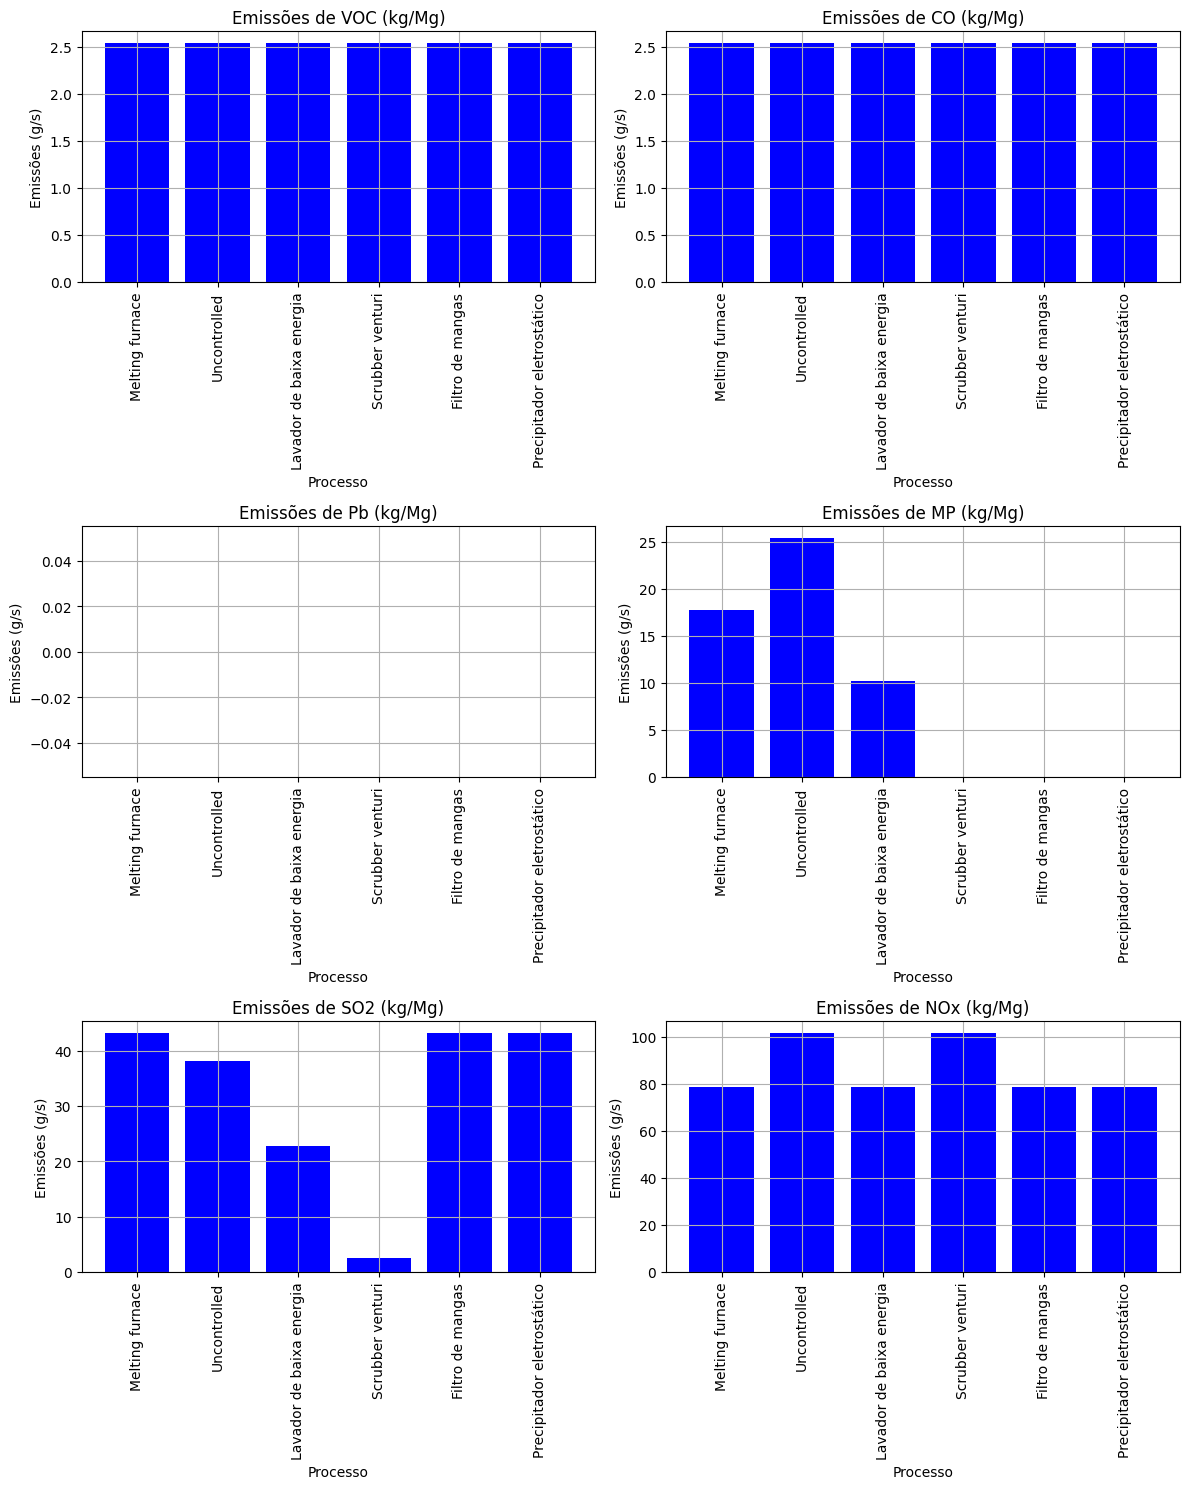

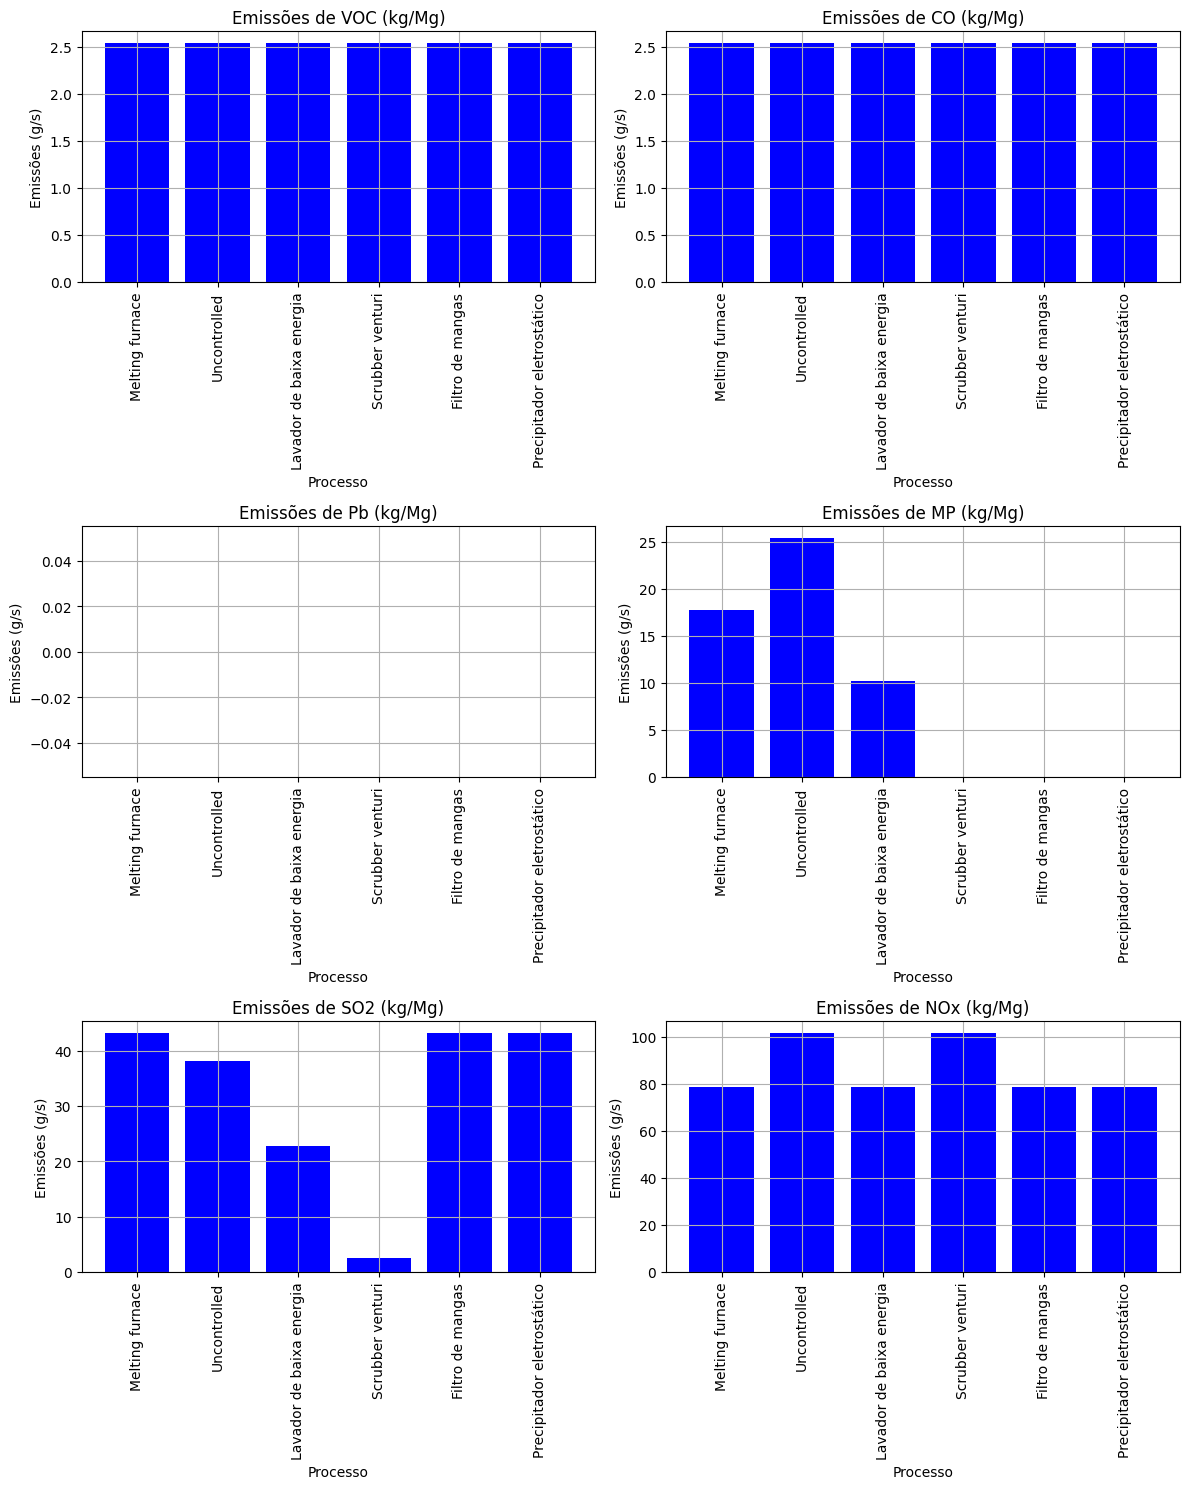

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
dados = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Lavador de baixa energia', 'Scrubber venturi', 'Filtro de mangas', 'Precipitador eletrostático'],
    'Sigla': ['MF', 'UC', 'LBE', 'SV', 'FM', 'PE'],
    'VOC (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'CO (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'Pb (kg/Mg)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'MP (kg/Mg)': [0.7, 1.0, 0.4, 0.0, 0.0, 0.0],
    'SO2 (kg/Mg)': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7],
    'NOx (kg/Mg)': [3.1, 4.0, 3.1, 4.0, 3.1, 3.1]
}

# Criando DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Definindo os processos
processos = df['Processo']

# Definindo as emissões de VOC, CO, Pb, MP, SO2 e NOx para cada processo
emissoes = df.drop(columns=['Processo', 'Sigla']) * 800000 * 1000 / (365 * 24 * 3600)  # Convertendo ton/ano para kg/s

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(12, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (g/s)')
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Exportando o gráfico como um arquivo PNG
plt.figure(figsize=(12, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (g/s)')
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

# Exportando o gráfico como um arquivo PNG
plt.savefig(f'D:/ENS5173_01/figures/poluentes_e_processos.png')

plt.tight_layout()
plt.show()



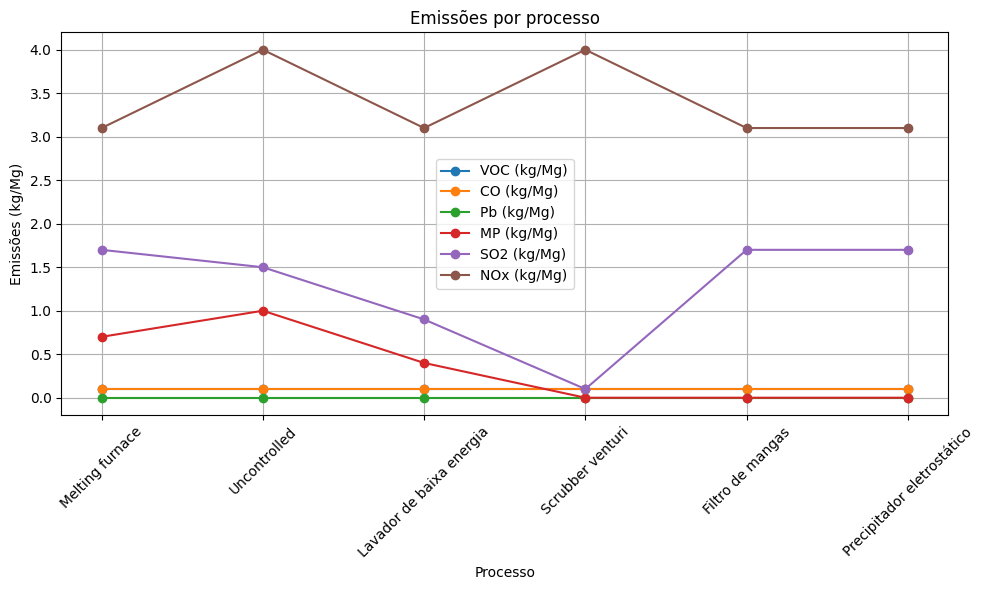

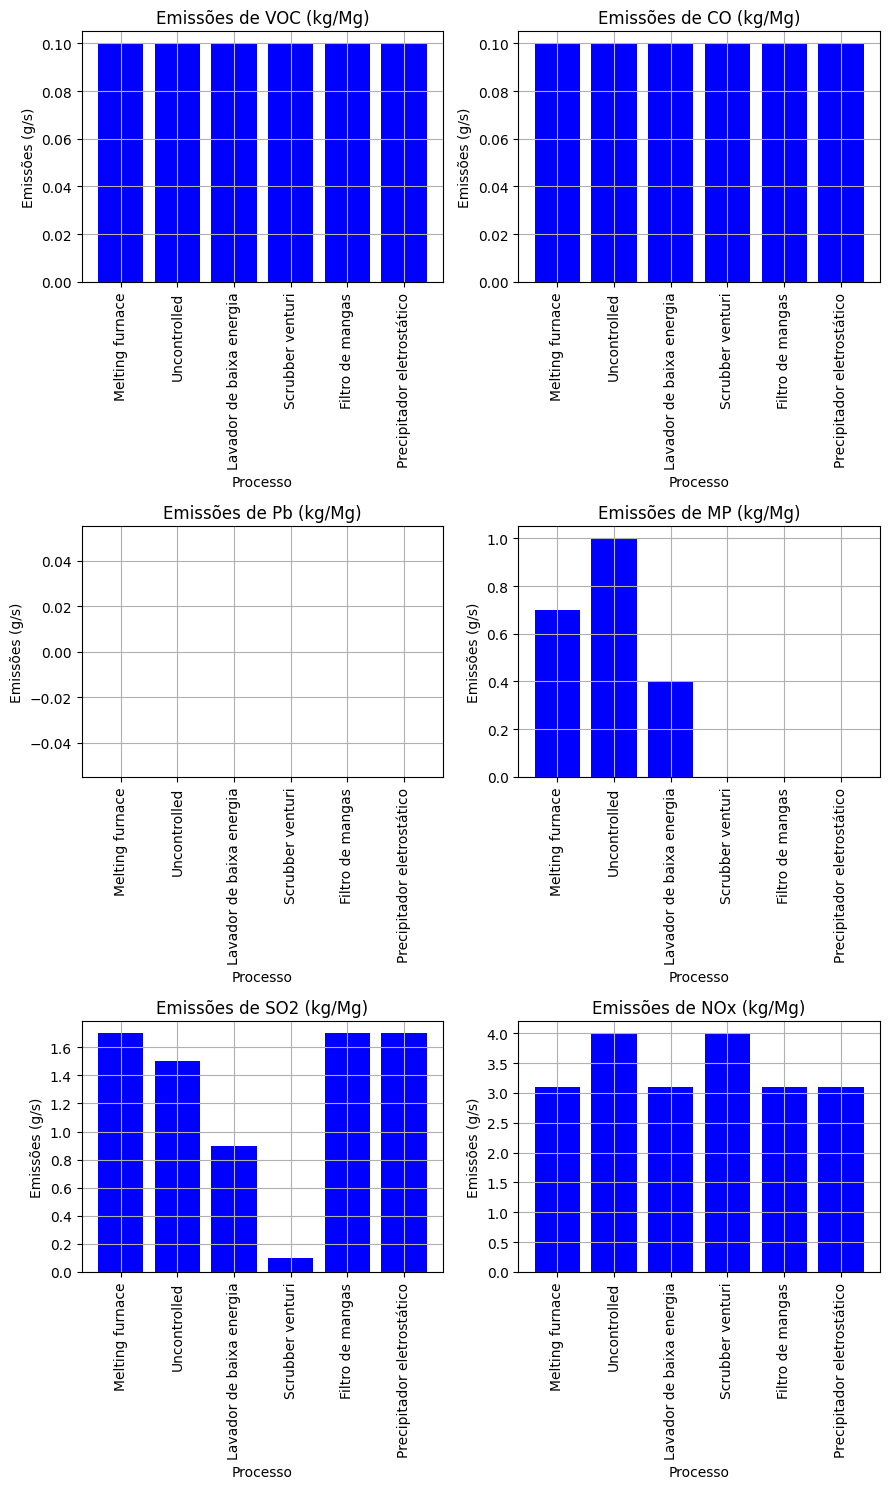

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
dados = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Lavador de baixa energia', 'Scrubber venturi', 'Filtro de mangas', 'Precipitador eletrostático'],
    'Sigla': ['MF', 'UC', 'LBE', 'SV', 'FM', 'PE'],
    'VOC (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'CO (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'Pb (kg/Mg)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'MP (kg/Mg)': [0.7, 1.0, 0.4, 0.0, 0.0, 0.0],
    'SO2 (kg/Mg)': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7],
    'NOx (kg/Mg)': [3.1, 4.0, 3.1, 4.0, 3.1, 3.1]
}

# Criando DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Definindo os processos
processos = df['Processo']

# Definindo as emissões de VOC, CO, Pb, MP, SO2 e NOx para cada processo
emissoes = df.drop(columns=['Processo', 'Sigla'])

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(10, 6))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.plot(processos, emissoes[poluente], marker='o', label=poluente)

plt.title('Emissões por processo')
plt.xlabel('Processo')
plt.ylabel('Emissões (kg/Mg)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(9, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (g/s)')
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()

# Exportando o gráfico como um arquivo PNG
plt.savefig('D:/ENS5173_01/figures/comparacao_processos.png')

plt.show()



In [30]:
#fazendo o panorama Capacidade nominal de produção de vidros planos (t/dia) da industria de vidro no brasil 

import pandas as pd

# Caminho do arquivo CSV
caminho_arquivo = r'D:\ENS5173_01\tabelas\PROD_BR\producao_ind_vidro.csv'

# Leia o arquivo CSV e armazene-o em um DataFrame, definindo nomes para as colunas
nomes_colunas = ['produtor', 'Planta', '2014 (ton/dia)', '2015 (ton/dia)', '2016 (ton/dia)', '2017 (ton/dia)', '2018 (ton/dia)', '2019 (ton/dia)', '2020 (ton/dia)', '2021 (ton/dia)']
df = pd.read_csv(caminho_arquivo, encoding='utf-8', header=None, names=nomes_colunas)

# Remova as linhas com valores nulos
df = df.dropna()

# Exiba o DataFrame para verificar as colunas presentes
print(df.head())

# Reorganize os dados usando a função pivot_table
df_pivot = df.pivot_table(index=['produtor', 'Planta'])

# Exiba o DataFrame reorganizado
print(df_pivot)







         produtor  Planta  2014 (ton/dia)  2015 (ton/dia)  2016 (ton/dia)  \
NaN NaN  produtor  Planta  2014 (ton/dia)  2015 (ton/dia)  2016 (ton/dia)   
    NaN   CEBRACE      C1             900             900             900   
    NaN   CEBRACE      C2             600             600             600   
    NaN   CEBRACE      C3             600             600             600   
    NaN   CEBRACE      C4             600             600             600   

         2017 (ton/dia)  2018 (ton/dia)  2019 (ton/dia)  2020 (ton/dia)  \
NaN NaN  2017 (ton/dia)  2018 (ton/dia)  2019 (ton/dia)  2020 (ton/dia)   
    NaN             900             900             900             900   
    NaN             600             600             600             600   
    NaN             600             600             600             600   
    NaN             600             600             600             600   

         2021 (ton/dia)  
NaN NaN  2021 (ton/dia)  
    NaN             900  
    NaN 

TypeError: agg function failed [how->mean,dtype->object]

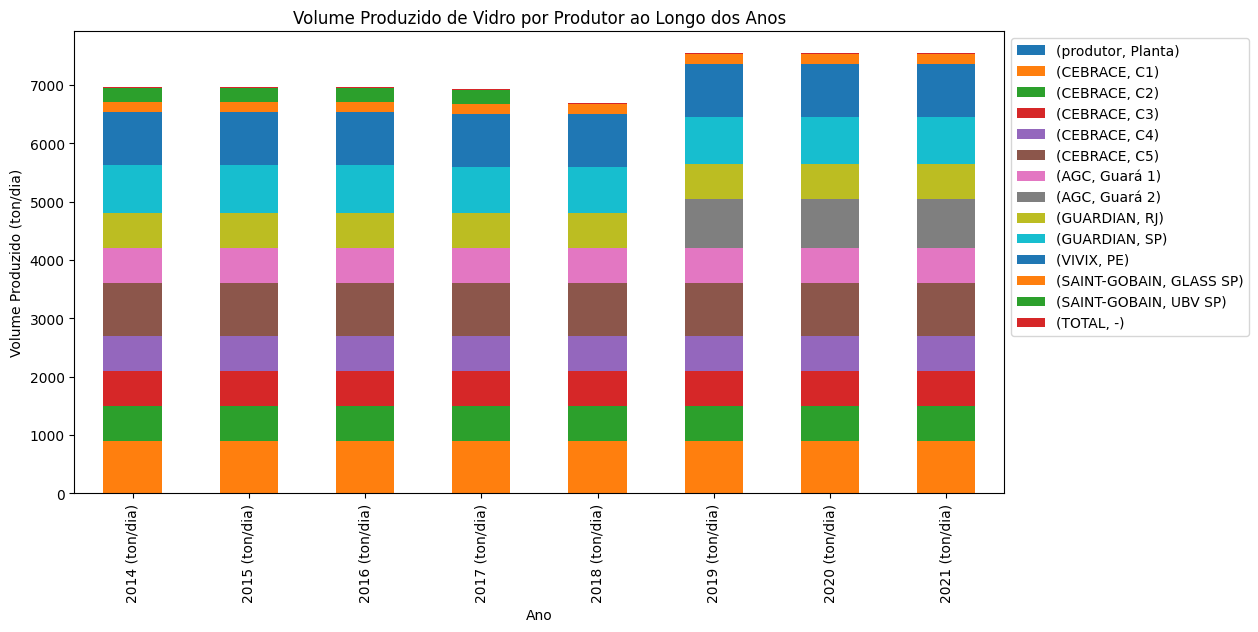

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo CSV
caminho_arquivo = r'D:\ENS5173_01\tabelas\PROD_BR\producao_ind_vidro.csv'

# Definindo nomes para as colunas
nomes_colunas = ['produtor', 'Planta', '2014 (ton/dia)', '2015 (ton/dia)', '2016 (ton/dia)', '2017 (ton/dia)', '2018 (ton/dia)', '2019 (ton/dia)', '2020 (ton/dia)', '2021 (ton/dia)']

# Leia o arquivo CSV e armazene-o em um DataFrame
df = pd.read_csv(caminho_arquivo, encoding='utf-8', names=nomes_colunas, skiprows=1)

# Convertendo as colunas numéricas para o tipo correto
colunas_numericas = ['2014 (ton/dia)', '2015 (ton/dia)', '2016 (ton/dia)', '2017 (ton/dia)', '2018 (ton/dia)', '2019 (ton/dia)', '2020 (ton/dia)', '2021 (ton/dia)']
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric, errors='coerce')

# Transpondo o DataFrame para que os anos se tornem linhas e os produtores se tornem colunas
df = df.set_index(['produtor', 'Planta']).T

# Plotando o gráfico de barras empilhadas
ax = df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adicionando título e rótulos dos eixos
plt.title('Volume Produzido de Vidro por Produtor ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Volume Produzido (ton/dia)')

# Exibindo a legenda fora do gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exportando a figura para um arquivo de imagem
caminho_figura = r'D:\ENS5173_01\figures\producao_vidro_por_produtor.png'
plt.savefig(caminho_figura, bbox_inches='tight')

# Mostrando o gráfico
plt.show()

